In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Przygotowanie danych

In [12]:
df = pd.read_csv('data/neo_v2.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


#### Usunięcie kolumn bez znaczenia

In [21]:
#Sprawdzamy, które kolumny nie mają znaczenia i usuwamy je
df['orbiting_body'].unique()


array(['Earth'], dtype=object)

In [22]:
data = df.drop('orbiting_body', axis='columns')

In [23]:
df['sentry_object'].unique()

array([False])

In [24]:
data = data.drop('sentry_object', axis='columns')

In [25]:
data.drop(['id', 'name'], axis='columns', inplace=True)

#### Czyszczenie danych

In [115]:
data.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


In [117]:
#Ze względu na to że est_diameter_min i max mają korelację 1, usuwamy jedną z nich
data.drop('est_diameter_min', axis='columns', inplace=True)

In [44]:
df['id'].nunique()

27423

In [118]:
data.isna().sum()

est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [119]:
data.isnull().sum()

est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [120]:
data.describe()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.284947,48066.918918,3.706655e+07,23.527103
std,0.667491,25293.296961,2.235204e+07,2.894086
min,0.001362,203.346433,6.745533e+03,9.230000
25%,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.320656,62923.604633,5.654900e+07,25.700000
max,84.730541,236990.128088,7.479865e+07,33.200000


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_max    90836 non-null  float64
 1   relative_velocity   90836 non-null  float64
 2   miss_distance       90836 non-null  float64
 3   absolute_magnitude  90836 non-null  float64
 4   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(4)
memory usage: 2.9 MB


In [122]:
df.sort_values('est_diameter_min', ascending=False)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False
72472,2001866,1866 Sisyphus (1972 XA),8.640820,19.321462,86394.013285,6.737501e+07,Earth,False,12.44,False
...,...,...,...,...,...,...,...,...,...,...
82493,54106298,(2021 BO),0.000683,0.001528,27805.638117,2.399589e+04,Earth,False,32.95,False
88408,54106298,(2021 BO),0.000683,0.001528,70539.503442,7.254528e+07,Earth,False,32.95,False
56366,54106298,(2021 BO),0.000683,0.001528,43432.989900,3.436341e+07,Earth,False,32.95,False
51038,54106298,(2021 BO),0.000683,0.001528,56370.197452,5.196340e+07,Earth,False,32.95,False


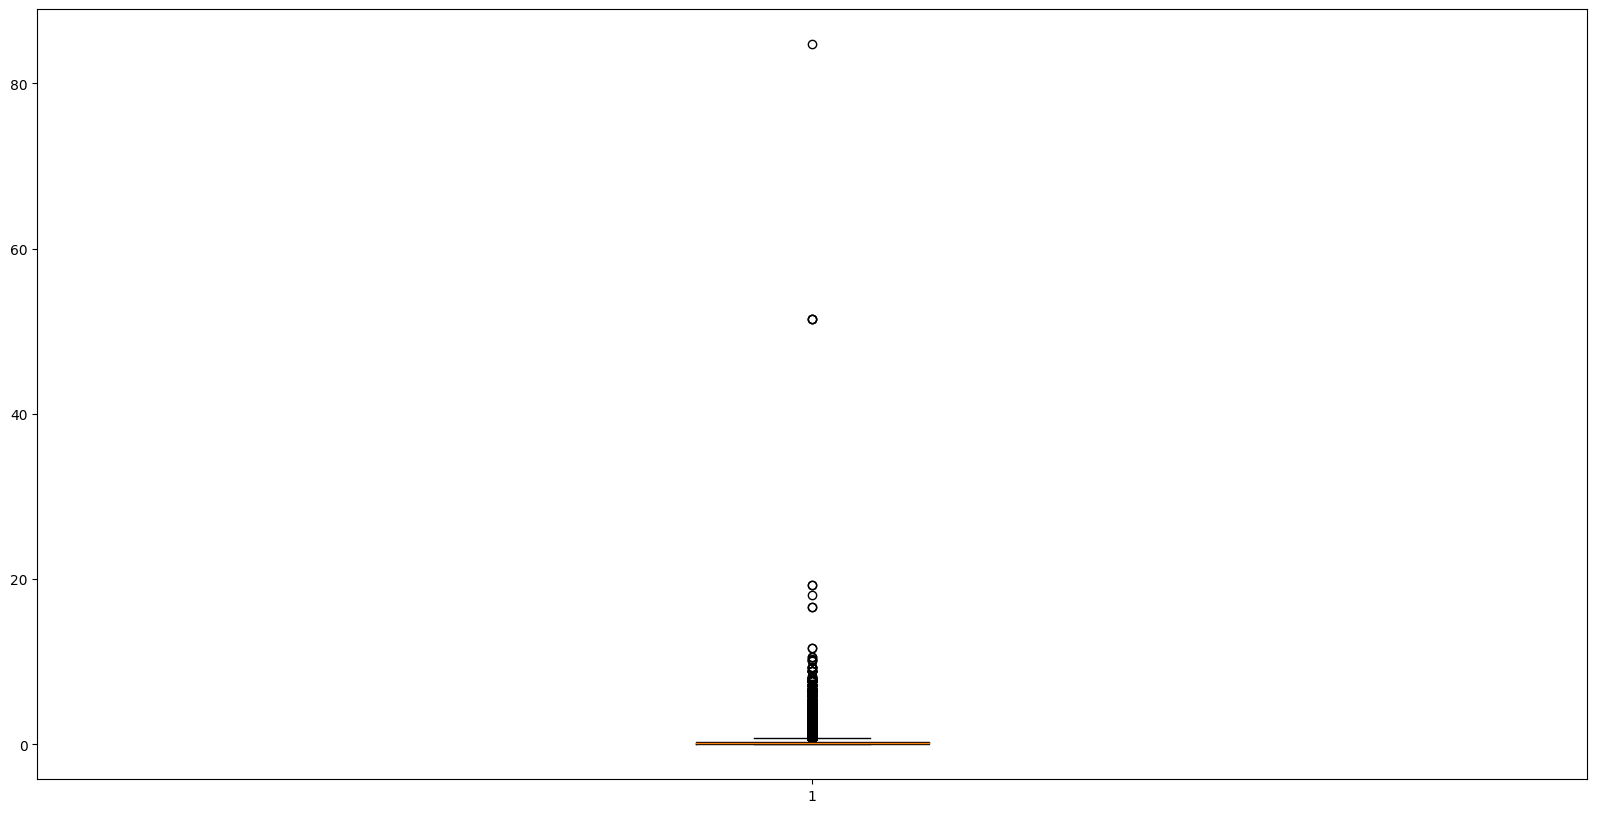

In [68]:
plt.figure(figsize=(20,10))
plt.boxplot(data['est_diameter_max']);

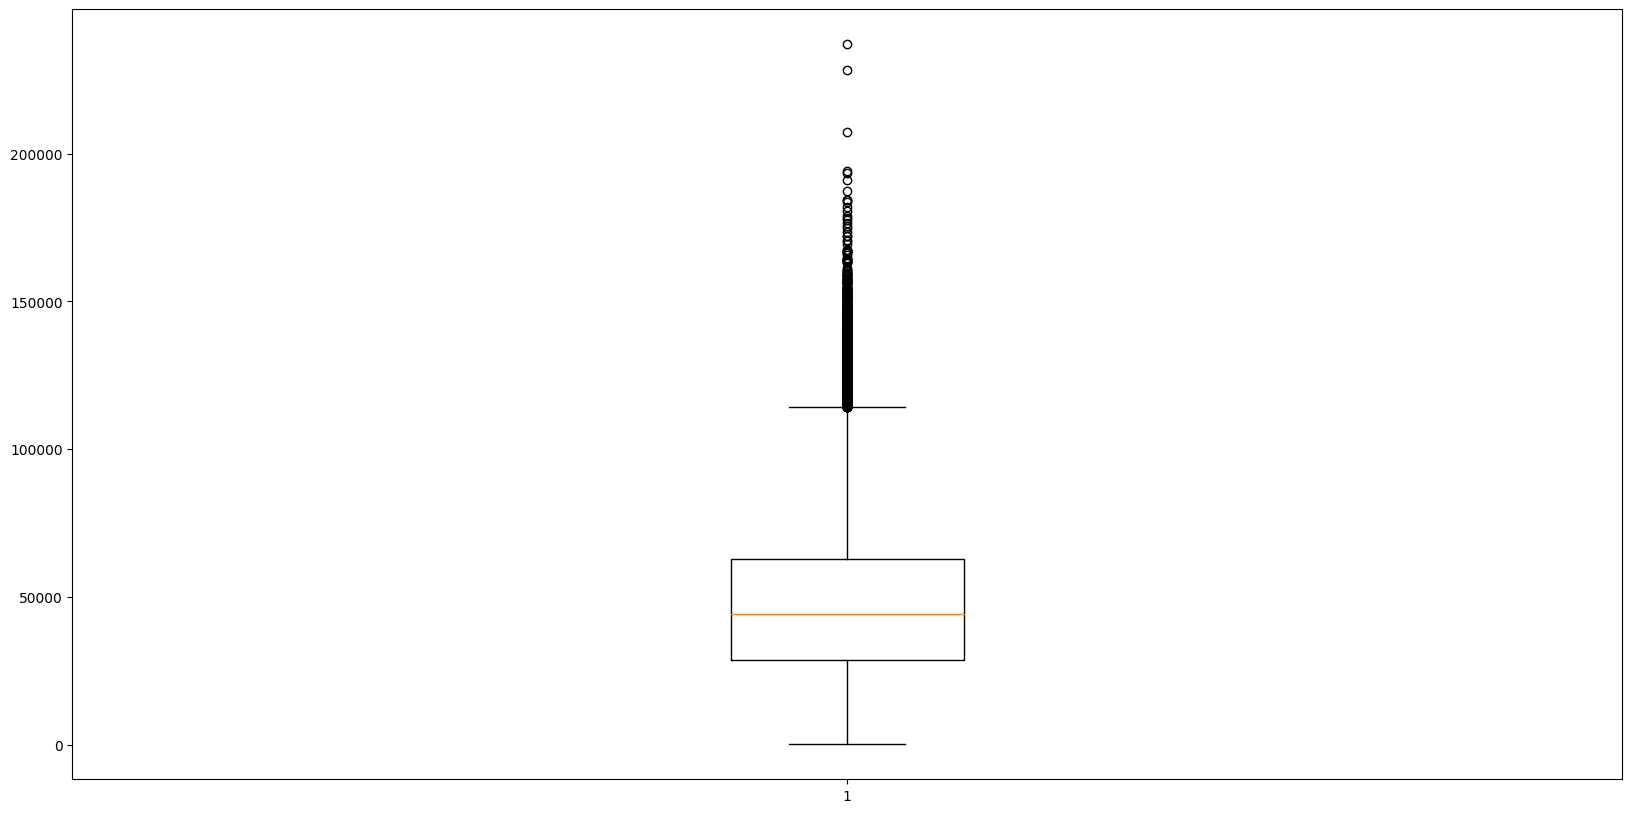

In [65]:
plt.figure(figsize=(20,10))
plt.boxplot(data['relative_velocity']);

In [123]:
data[data['hazardous'] == True].sort_values('miss_distance', ascending=False)

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
42127,0.875064,41670.995752,7.479095e+07,19.16,True
48158,0.879103,91847.754688,7.478335e+07,19.15,True
62853,0.271669,69573.352182,7.478247e+07,21.70,True
44329,1.132505,106802.283952,7.478231e+07,18.60,True
54100,0.358129,95922.093494,7.477855e+07,21.10,True
...,...,...,...,...,...
69807,0.583499,125807.719190,4.868071e+05,20.04,True
17142,0.783502,62664.322585,4.324384e+05,19.40,True
17150,0.651688,62664.322601,4.324384e+05,19.80,True
36740,0.277997,49379.390941,3.249307e+05,21.65,True


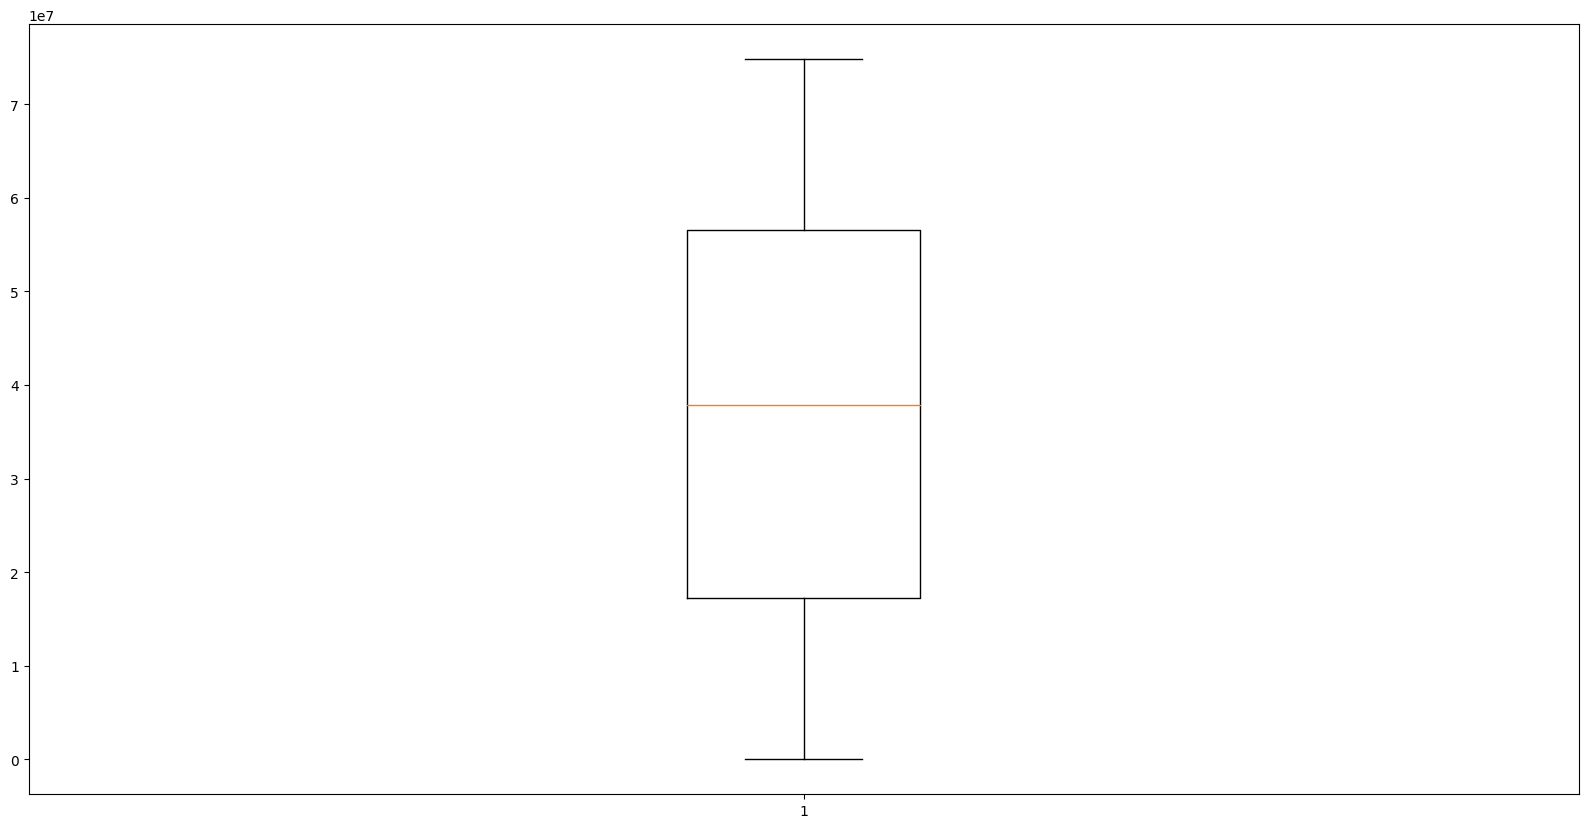

In [125]:
plt.figure(figsize=(20,10))
plt.boxplot(data['miss_distance']);

#### Przykładowe drzewo decyzyjne dla est_diameter_max

In [165]:
from sklearn.tree import DecisionTreeClassifier,plot_tree  # dla klasyfikacji
from sklearn.metrics import accuracy_score  # dla klasyfikacji
from sklearn.metrics import mean_squared_error  # dla regresji
from sklearn.model_selection import train_test_split

In [168]:
data_y = data['hazardous']
X_train, X_test, y_train, y_test = train_test_split(data['est_diameter_max'].to_numpy().reshape(-1,1), data_y.to_numpy().reshape(-1,1), test_size=0.3, random_state=123)


# Dla klasyfikacji
clf = DecisionTreeClassifier(max_depth=5,random_state=123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

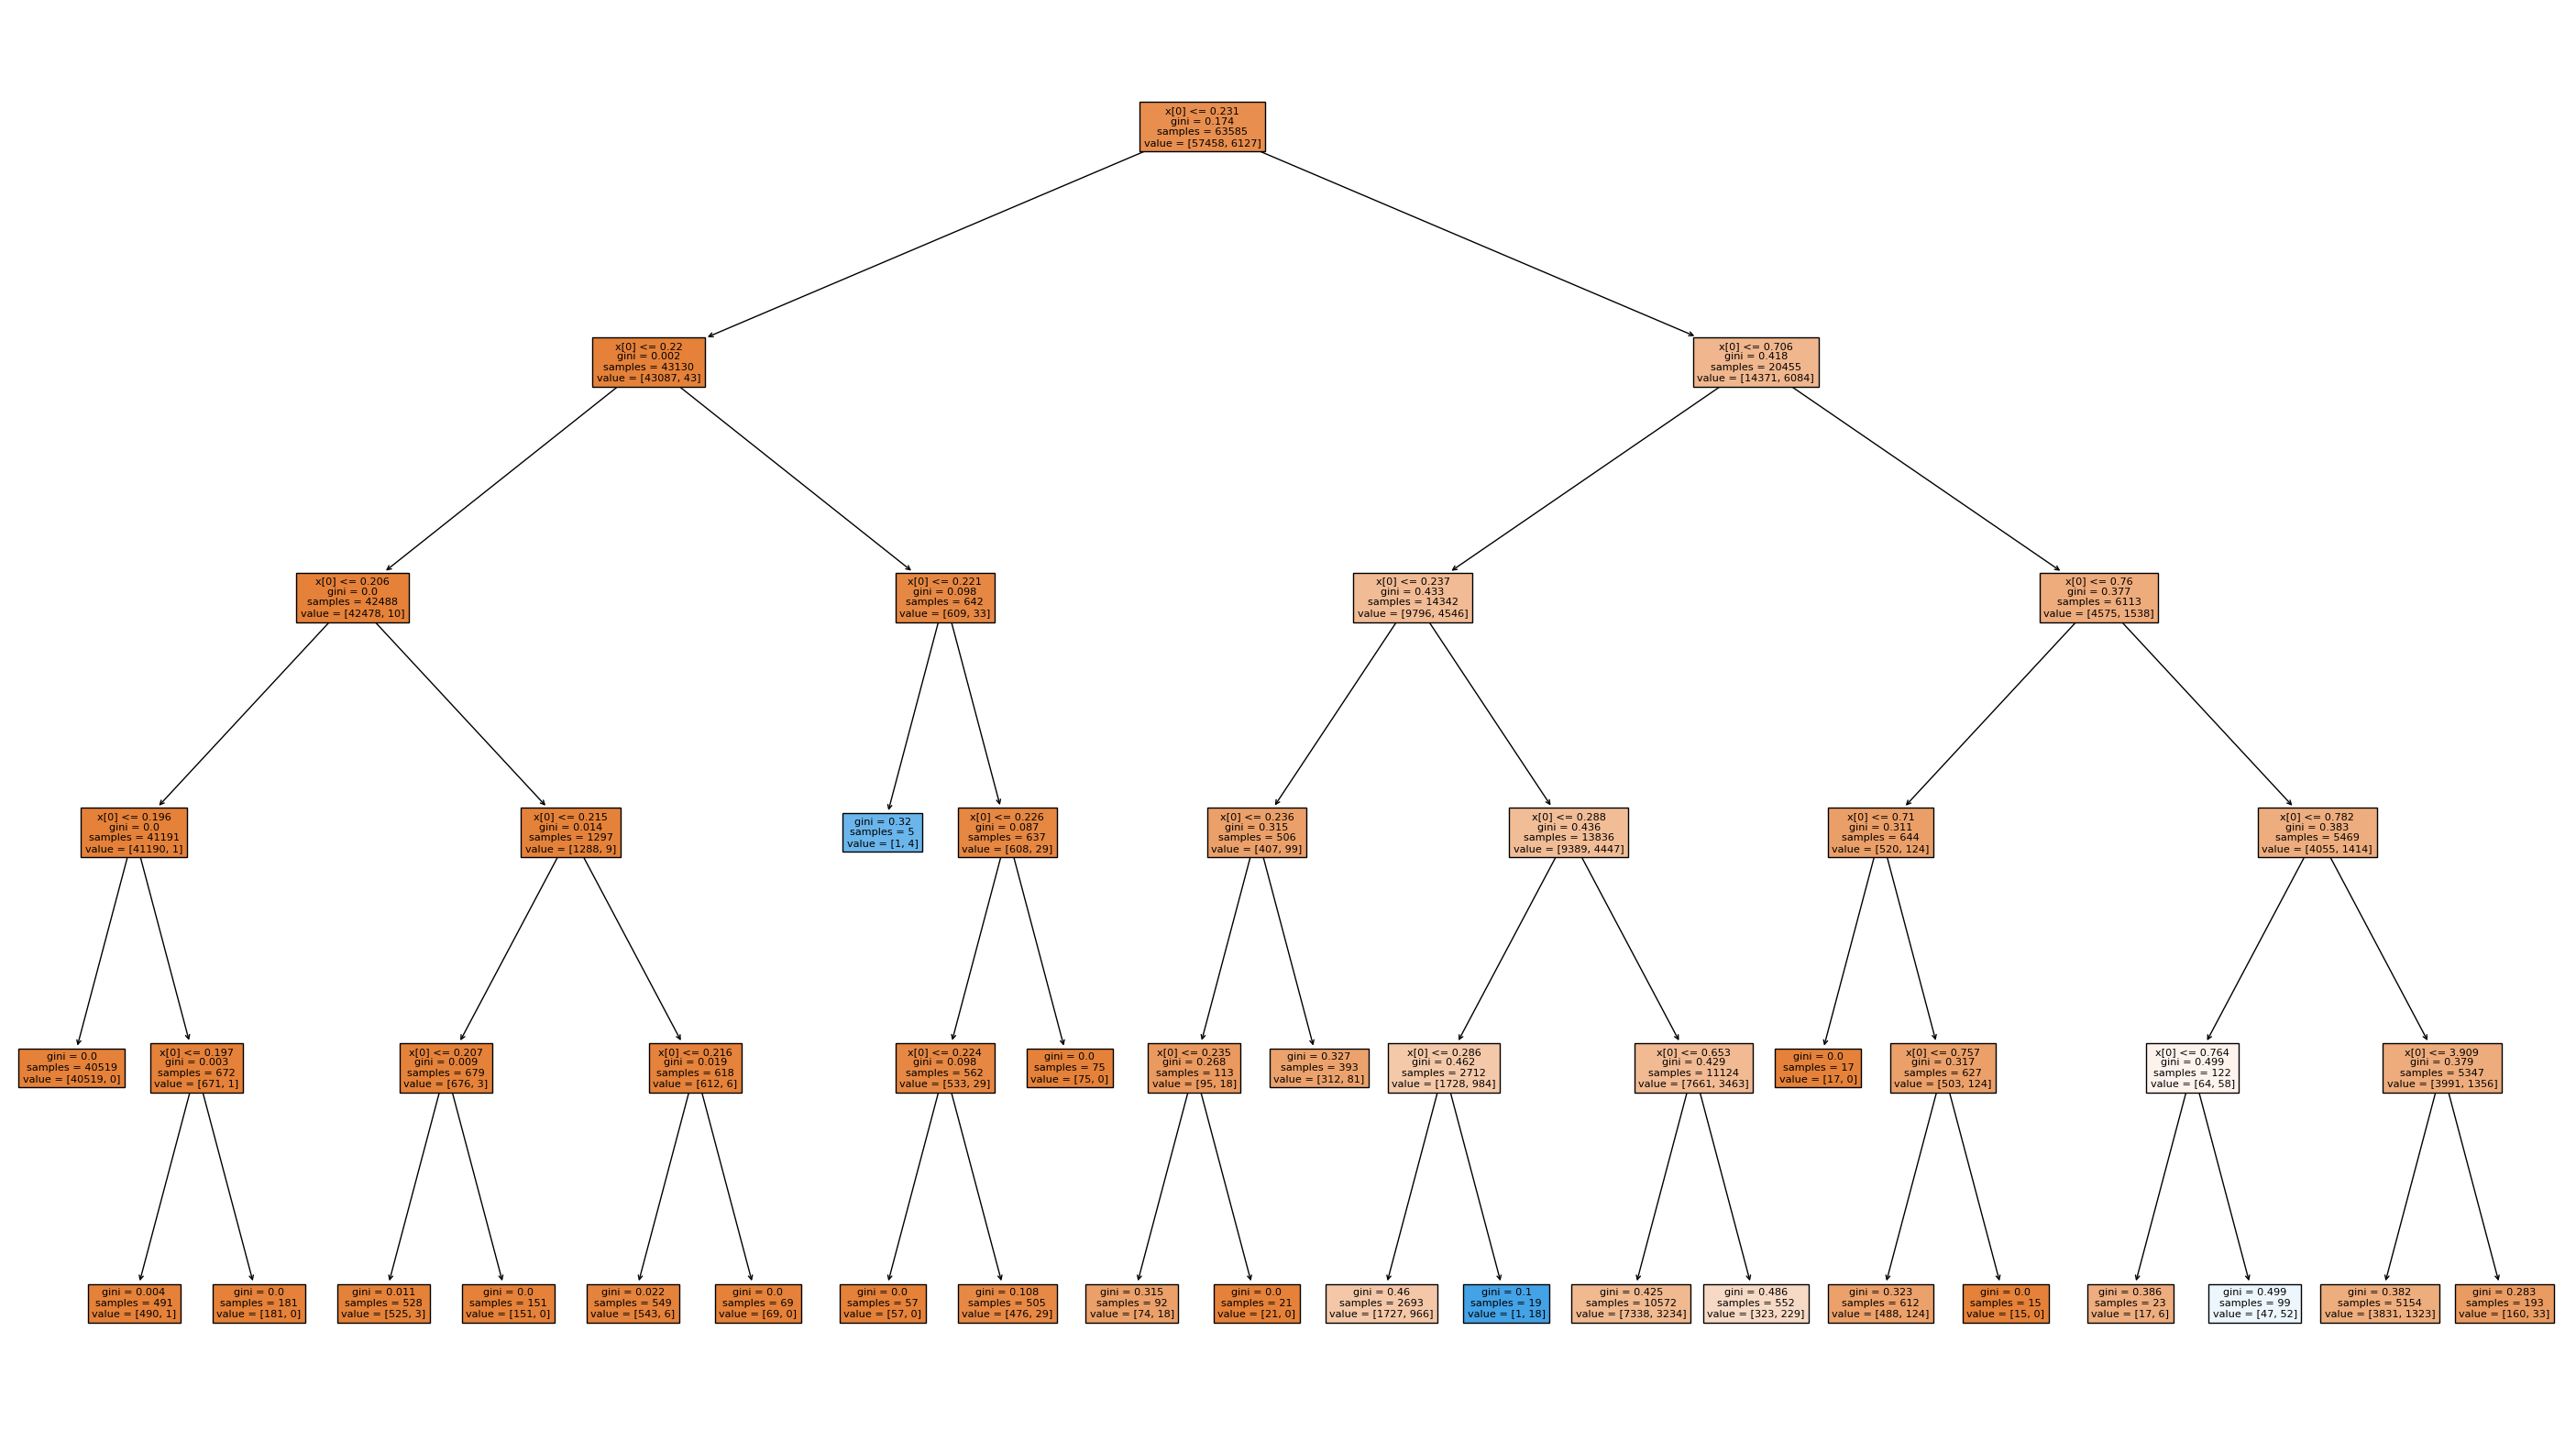

In [171]:
plt.figure(figsize=(36, 20))  # Rozmiar rysunku
plot_tree(clf, filled=True)
plt.show()

## Wybieramy model wstępny

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [155]:
data_x = data.drop('hazardous', axis='columns')
data_y = data['hazardous']

In [156]:
minmax = MinMaxScaler()
data_x = minmax.fit_transform(data_x)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.3, random_state=123)

In [158]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)

In [159]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=123)

In [152]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

In [160]:
print(classification_report(y_pred=pred_train,y_true=y_train))
# UWAGA UWAGA
#Recall dla True jest tylko 0.14 co oznacza że istnieje duża szansa że asteroidę niebezpieczną zklasyfikujemy jako bezpieczną za pomocą naszego modelu

              precision    recall  f1-score   support

       False       0.92      1.00      0.95     57458
        True       0.83      0.14      0.24      6127

    accuracy                           0.91     63585
   macro avg       0.87      0.57      0.60     63585
weighted avg       0.91      0.91      0.89     63585



In [161]:
print(classification_report(y_pred=pred_test,y_true=y_test))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     24538
        True       0.80      0.12      0.21      2713

    accuracy                           0.91     27251
   macro avg       0.86      0.56      0.58     27251
weighted avg       0.90      0.91      0.88     27251

